In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [ ]:
data = pd.read_csv("edges.csv")
data

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [ ]:
filter1 = data["comic"].str.startswith(("A ", "A2", "A3"))
data[filter1].drop_duplicates(subset = "comic")

,hero,comic
84,ABSORBING MAN/CARL C,A 183
85,ABSORBING MAN/CARL C,A 184
86,ABSORBING MAN/CARL C,A 20/4
87,ABSORBING MAN/CARL C,A 270
88,ABSORBING MAN/CARL C,A 273
...,...,...
61178,PHARAOH RAMA-TUT,A 21/4
71356,SET,A 18/4
78065,"STANKOWICZ, FABIAN",A 321/2
88719,VISION,A 20/3


In [ ]:
layers = []
for i in ["A ", "A2", "A3"]:
    filters = data["comic"].str.startswith(i)
    layers.append(data[filters])

In [ ]:
layers[0]

,hero,comic
84,ABSORBING MAN/CARL C,A 183
85,ABSORBING MAN/CARL C,A 184
86,ABSORBING MAN/CARL C,A 20/4
87,ABSORBING MAN/CARL C,A 270
88,ABSORBING MAN/CARL C,A 273
...,...,...
95975,ZIRCONIUM,A 188
95983,"ZOLA, ARNIM",A 13
96038,"ZOTA, CARLO",A 12
96039,"ZOTA, CARLO",A 262


In [ ]:
layers[0]['issue'] = layers[0]['comic'].str[2:]

<ipython-input-7-e383180e8036>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers[0]['issue'] = layers[0]['comic'].str[2:]


In [ ]:
issues1 = layers[0][~layers[0]['issue'].str.startswith("'")]
issues1

,hero,comic,issue
84,ABSORBING MAN/CARL C,A 183,183
85,ABSORBING MAN/CARL C,A 184,184
86,ABSORBING MAN/CARL C,A 20/4,20/4
87,ABSORBING MAN/CARL C,A 270,270
88,ABSORBING MAN/CARL C,A 273,273
...,...,...,...
95975,ZIRCONIUM,A 188,188
95983,"ZOLA, ARNIM",A 13,13
96038,"ZOTA, CARLO",A 12,12
96039,"ZOTA, CARLO",A 262,262


In [ ]:
for i in range(len(issues1)):
    issues1.iloc[i, 2] = issues1.iloc[i, 2].split("/",1)[0]
    issues1.iloc[i, 2] = issues1.iloc[i, 2].split("-",1)[0]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
silver = issues1[issues1['issue'].astype(float) <= 82]
silver = silver[["hero", "comic"]]
silver.drop_duplicates(subset = "hero")

,hero,comic
86,ABSORBING MAN/CARL C,A 20/4
207,"ADAMS, NICOLE NIKKI",A 77
1003,ANGEL/WARREN KENNETH,A 3
1525,ANT-MAN/DR. HENRY J.,A 1
2208,APE MAN/GORDON MONK,A 12
...,...,...
95795,"ZEDRAO, GENERAL",A 14
95824,ZEMO/BARON HEINRICH,A 10
95867,ZEUS,A 23
95983,"ZOLA, ARNIM",A 13


In [ ]:
silver[silver['hero'] == 'CAPTAIN AMERICA']

,hero,comic
11117,CAPTAIN AMERICA,A 1
11118,CAPTAIN AMERICA,A 10
11127,CAPTAIN AMERICA,A 11
11138,CAPTAIN AMERICA,A 12
11142,CAPTAIN AMERICA,A 13
...,...,...
11448,CAPTAIN AMERICA,A 8
11449,CAPTAIN AMERICA,A 80
11450,CAPTAIN AMERICA,A 81
11451,CAPTAIN AMERICA,A 82


In [ ]:
silver[silver["comic"] == 'A 10']

,hero,comic
1526,ANT-MAN/DR. HENRY J.,A 10
2441,"ARBOGAST, BAMBI",A 10
3338,AVALANCHE/DOMINIC PE,A 10
4846,BEAST/HENRY &HANK& P,A 10
6055,BINARY/CAROL DANVERS,A 10
8351,BLOB/FRED J. DUKES,A 10
11118,CAPTAIN AMERICA,A 10
15411,COLOSSUS II/PETER RA,A 10
20300,DESTINY II/IRENE ADL,A 10
24115,ENCHANTRESS/AMORA/HE,A 10


In [ ]:
bronze = issues1[(issues1['issue'].astype(float) > 82) & (issues1['issue'].astype(float) <= 242)]
bronze = bronze[["hero", "comic"]]
bronze.drop_duplicates(subset = "hero")

,hero,comic
84,ABSORBING MAN/CARL C,A 183
675,AMERICAN EAGLE II/JA,A 85
696,AMPHIBIAN/KINGLEY RI,A 148
709,AMPHIBIUS,A 105
960,ANELLE,A 94
...,...,...
95298,YELLOW CLAW/TZING JA,A 204
95481,ZABU,A 118
95825,ZEMO/BARON HEINRICH,A 131
95865,ZEUS,A 100


In [ ]:
modern = issues1[issues1['issue'].astype(float) > 242]
modern = modern[["hero", "comic"]]
modern = pd.concat([modern, layers[1]])
modern.drop_duplicates(subset = "hero")

,hero,comic
87,ABSORBING MAN/CARL C,A 270
246,ADORA,A 260
363,AGINAR,A 248
430,AJAK/TECUMOTZIN [ETE,A 248
668,AMENHOTEP,A 353
...,...,...
95868,ZEUS,A 281
95958,ZIRAN,A 339
96039,"ZOTA, CARLO",A 262
20106,"DE LA SALLE, BEATRIC",A2 3


In [ ]:
heroes = pd.concat([layers[2], layers[0][layers[0]['issue'].str.startswith("'")]])
heroes.drop_duplicates(subset = "hero")

,hero,comic,issue
1626,ANT-MAN/DR. HENRY J.,A3 1,NaN
2096,ANT-MAN II/SCOTT HAR,A3 26,NaN
2564,ARCANNA/ARCANNA JONE,A3 5,NaN
2750,ARKON,A3 17,NaN
3088,ATTUMA,A3 42,NaN
...,...,...,...
87935,VAKUME,A '00,'00
88419,VERTIGO,A '00,'00
89783,"WALKER, MICKEY",A '00,'00
93030,"WOLFE, HEDY",A '00,'00


In [ ]:
# The variables with dataframes are silver, bronze, modern, and heroes

In [ ]:
B = nx.Graph()
B.add_nodes_from(silver['hero'].drop_duplicates(), bipartite=0)
B.add_nodes_from(silver['comic'].drop_duplicates(), bipartite=1)
B.add_edges_from([(row['hero'], row['comic']) for idx, row in silver.iterrows()])
Gsilver = bipartite.projected_graph(B, silver['hero'])
Gsilver_weighted = bipartite.weighted_projected_graph(B, silver['hero'].drop_duplicates())

In [ ]:
# pos = {node:[0, i] for i,node in enumerate(silver['hero'])}
# pos.update({node:[1, i] for i,node in enumerate(silver['comic'])})
# nx.draw(B, pos, with_labels=False)
# for p in pos:  # raise text positions
#     pos[p][1] += 0.25
# nx.draw_networkx_labels(B, pos)

# plt.show()

In [ ]:
# Gsilver_weighted.edges.data()

In [ ]:
B = nx.Graph()
B.add_nodes_from(bronze['hero'].drop_duplicates(), bipartite=0)
B.add_nodes_from(bronze['comic'].drop_duplicates(), bipartite=1)
B.add_edges_from([(row['hero'], row['comic']) for idx, row in bronze.iterrows()])
Gbronze = bipartite.projected_graph(B, bronze['hero'])
Gbronze_weighted = bipartite.weighted_projected_graph(B, bronze['hero'].drop_duplicates())

In [ ]:
B = nx.Graph()
B.add_nodes_from(modern['hero'].drop_duplicates(), bipartite=0)
B.add_nodes_from(modern['comic'].drop_duplicates(), bipartite=1)
B.add_edges_from([(row['hero'], row['comic']) for idx, row in modern.iterrows()])
Gmodern = bipartite.projected_graph(B, modern['hero'])
Gmodern_weighted = bipartite.weighted_projected_graph(B, modern['hero'].drop_duplicates())

In [ ]:
B = nx.Graph()
B.add_nodes_from(heroes['hero'].drop_duplicates(), bipartite=0)
B.add_nodes_from(heroes['comic'].drop_duplicates(), bipartite=1)
B.add_edges_from([(row['hero'], row['comic']) for idx, row in heroes.iterrows()])
Gheroes = bipartite.projected_graph(B, heroes['hero'])
Gheroes_weighted = bipartite.weighted_projected_graph(B, heroes['hero'].drop_duplicates())

### The graphs (nodes = heros, edge = they appear in same comic) are named Gsilver, Gbronze, Gmodern, and Gheroes.
### The weighted ones have weight = number of times appear in same comic, and the graphs are named with _weighted.

## Remove nodes that low degrees and appear 

In [ ]:
for node in Gsilver.nodes():
    print(Gsilver.degree[node] > 3)
    print(Gsilver.has_node(node))
    print(Gsilver.has_node(node))
    break

False
True
True


In [ ]:
def remove_nodes(G, low_deg, low_layer, weight, *args):
    ''' remove nodes from a networkx graph G, that have too low a degree (lower than or equal to low_deg) and
    exist in too few layers (lower than or equal to low_layer). 
    The other layers (of form of networkx graphs as well) are given in args.
    For weighted graph, can use weight = 'weight'
    '''
    need_remove = []
    for node in G.nodes():
        layers = 1
        for L in args:
            if (L.has_node(node) == True):
                layers = layers + 1
        if ((G.degree[node] <= low_deg) & (layers <= low_layer)):
            need_remove.append(node)
    print(need_remove)
    G.remove_nodes_from(need_remove)

In [ ]:
remove_nodes(Gsilver, 10, 3, None, Gbronze, Gmodern, Gheroes)
remove_nodes(Gbronze, 10, 3, None, Gsilver, Gmodern, Gheroes)
remove_nodes(Gmodern, 10, 3, None, Gsilver, Gbronze, Gheroes)
remove_nodes(Gheroes, 10, 3, None, Gsilver, Gbronze, Gmodern)

['ABSORBING MAN/CARL C', 'ADAMS, NICOLE NIKKI', 'APOLLO [GREEK GOD]', 'BEETLE/ABNER RONALD', 'BYRD, SEN. HARRINGTO', 'CARTER, PEGGY', 'DE LA FONTAINE, CONT', 'EGGHEAD/PROF. ELIHAS', 'JAMESON, J. JONAH', 'MACLAIN, DR. MYRON', 'MERLIN', 'PENDRAGON, ARTHUR', 'PLANTMAN/SAM SMITHER', 'PUPPET MASTER/PHILLI', 'REDWING', 'SET', 'STILT-MAN/WILBUR DAY', 'SUPER-ADAPTOID/ALESS', 'SURTUR', 'TAKU', 'TULAK', 'WATER WIZARD/PETE', "W'KABI", 'WRECKER III/DIRK GAR', 'YMIR']
['ARKON', 'BEERE, JASON', 'BERSERKER', 'BLACK TALON II/SAMUE', 'BOGGS, MORDECAI P.', 'CANTOR, VERA', 'CHAMPION, IMUS', 'DAMBALLAH II', 'DRAX/ARTHUR DOUGLAS', 'HARDY, MORGAN MACNEI', 'LANG, CASSANDRA CASS', 'LETTERMAN, DAVID', 'MANIPULATOR/', 'MOLECULE MAN/OWEN RE', 'SANTINI, DR. JOSE', 'SOLARR', 'SOUTHERN, CANDY', 'TYPHON', 'VIPER II', 'YELLOW CLAW/TZING JA']
['AMPERE/', 'ARIDES', 'BARON BRIMSTONE/', 'BERDITCHEV, ITZHAK', 'BLOOD BROTHERS', 'BRAWLER', 'DEVLOR', 'DOC SAMSON/DR. LEONA', 'DOOMSDAY MAN II', 'EHMAN, HEIDI', 'GALEN KOR, ADMI

### May need to loop several times because more will have "too little degree" after removal.

In [ ]:
# for i in range(10):
#     remove_nodes(Gsilver, 10, 3, Gbronze, Gmodern, Gheroes)
#     remove_nodes(Gbronze, 10, 3, Gsilver, Gmodern, Gheroes)
#     remove_nodes(Gmodern, 10, 3, Gsilver, Gbronze, Gheroes)
#     remove_nodes(Gheroes, 10, 3, Gsilver, Gbronze, Gmodern)

In [ ]:
remove_nodes(Gsilver_weighted, 10, 3, 'weight', Gbronze_weighted, Gmodern_weighted, Gheroes_weighted)
remove_nodes(Gbronze_weighted, 10, 3, 'weight', Gsilver_weighted, Gmodern_weighted, Gheroes_weighted)
remove_nodes(Gmodern_weighted, 10, 3, 'weight', Gsilver_weighted, Gbronze_weighted, Gheroes_weighted)
remove_nodes(Gheroes_weighted, 10, 3, 'weight', Gsilver_weighted, Gbronze_weighted, Gmodern_weighted)

['ABSORBING MAN/CARL C', 'ADAMS, NICOLE NIKKI', 'APOLLO [GREEK GOD]', 'BEETLE/ABNER RONALD', 'BYRD, SEN. HARRINGTO', 'CARTER, PEGGY', 'DE LA FONTAINE, CONT', 'EGGHEAD/PROF. ELIHAS', 'JAMESON, J. JONAH', 'MACLAIN, DR. MYRON', 'MERLIN', 'PENDRAGON, ARTHUR', 'PLANTMAN/SAM SMITHER', 'PUPPET MASTER/PHILLI', 'REDWING', 'SET', 'STILT-MAN/WILBUR DAY', 'SUPER-ADAPTOID/ALESS', 'SURTUR', 'TAKU', 'TULAK', 'WATER WIZARD/PETE', "W'KABI", 'WRECKER III/DIRK GAR', 'YMIR']
['ARKON', 'BEERE, JASON', 'BERSERKER', 'BLACK TALON II/SAMUE', 'BOGGS, MORDECAI P.', 'CANTOR, VERA', 'CHAMPION, IMUS', 'DAMBALLAH II', 'DRAX/ARTHUR DOUGLAS', 'HARDY, MORGAN MACNEI', 'LANG, CASSANDRA CASS', 'LETTERMAN, DAVID', 'MANIPULATOR/', 'MOLECULE MAN/OWEN RE', 'SANTINI, DR. JOSE', 'SOLARR', 'SOUTHERN, CANDY', 'TYPHON', 'VIPER II', 'YELLOW CLAW/TZING JA']
['AMPERE/', 'ARIDES', 'BARON BRIMSTONE/', 'BERDITCHEV, ITZHAK', 'BLOOD BROTHERS', 'BRAWLER', 'DEVLOR', 'DOC SAMSON/DR. LEONA', 'DOOMSDAY MAN II', 'EHMAN, HEIDI', 'GALEN KOR, ADMI

In [ ]:
comm_heroes = list(set(silver['hero']).intersection(bronze['hero']))
comm_heroes = list(set(comm_heroes).intersection(modern['hero']))
comm_heroes = list(set(comm_heroes).intersection(heroes['hero']))

In [ ]:
def remove_n(G):
  A = G
  node_lis = list(G.nodes)
  remove_lis = []
  for i in node_lis:
    if i not in comm_heroes:
      remove_lis += [i]
  print(remove_lis)
  A.remove_nodes_from(remove_lis)
  return A

In [ ]:
Gsilver_weighted_comm = remove_n(Gsilver_weighted)
Gbronze_weighted_comm = remove_n(Gbronze_weighted)
Gmodern_weighted_comm = remove_n(Gmodern_weighted)
Gheroes_weighted_comm = remove_n(Gheroes_weighted)

['ANGEL/WARREN KENNETH', 'APE MAN/GORDON MONK', 'APOCRYPHUS', 'AQUARIUS/DARREN BENT', 'ARAGORN', 'ARBOGAST, BAMBI', 'ARES [GREEK GOD]', 'ARIES/MARCUS LASSITE', 'ARKON', 'ARSENAL', 'AVALANCHE/DOMINIC PE', 'BANNER, BETTY ROSS T', 'BARON BLOOD/JOHN FAL', 'BASALLO/LAVA MEN KIN', 'BIG BERTHA/ASHLEY CR', 'BLACK BOLT/BLACKANTO', 'BLACK GOLIATH/DR. WI', 'BLACK KNIGHT II/SIR', 'BLACK KNIGHT IV/PROF', 'BLACK KNIGHT/SIR PER', 'BLOB/FRED J. DUKES', 'BOWMAN, MAJ.', 'BRUTO THE STRONGMAN/', 'BRUTUS', 'BUCKY/BUCKY BARNES', 'CANCER/JACK KLEVENO', 'CANNONBALL/JACK PULV', 'CAPRICORN/WILLARD WE', 'CAPTAIN MARVEL/CAPTA', 'CLEA', 'CLOWN/CRAFTY ELIOT F', 'COLLECTOR/TANELEER T', 'COLOSSUS II/PETER RA', 'COOPER, DR. VALERIE', 'CYCLOPS/SCOTT SUMMER', 'DEATH', 'DEATH ADDER', 'DEATHUNT 9000', 'DESTINY II/IRENE ADL', 'DIABLO/ESTEBAN DE AB', 'DINAH-SOAR', 'DOORMAN', 'DRACULA/VLAD TEPES', 'DRAGON MAN', 'DRAX/ARTHUR DOUGLAS', 'DR. DOOM/VICTOR VON', 'DR. SPECTRUM II/DR.', 'DR. SPECTRUM III/REV', 'DR. STRANGE/STEPHEN',

In [ ]:
degree_centrality = nx.algorithms.centrality.degree_centrality(Gsilver_weighted_comm)
for i, w in enumerate(sorted(degree_centrality, key=degree_centrality.get, reverse=True)):
    if(i<10):
        print(w, degree_centrality[w])
    else:
        break

CAPTAIN AMERICA 1.0
THOR/DR. DONALD BLAK 1.0
VISION 1.0
WASP/JANET VAN DYNE 1.0
ANT-MAN/DR. HENRY J. 0.9130434782608695
IRON MAN/TONY STARK 0.9130434782608695
JARVIS, EDWIN 0.9130434782608695
HAWK 0.8913043478260869
QUICKSILVER/PIETRO M 0.8913043478260869
SCARLET WITCH/WANDA 0.8913043478260869


In [ ]:
top10_ids = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print(top10_ids)
print()
print([degree_centrality[id] for id in top10_ids])

['CAPTAIN AMERICA', 'THOR/DR. DONALD BLAK', 'VISION', 'WASP/JANET VAN DYNE', 'ANT-MAN/DR. HENRY J.', 'IRON MAN/TONY STARK', 'JARVIS, EDWIN', 'HAWK', 'QUICKSILVER/PIETRO M', 'SCARLET WITCH/WANDA']

[1.0, 1.0, 1.0, 1.0, 0.9130434782608695, 0.9130434782608695, 0.9130434782608695, 0.8913043478260869, 0.8913043478260869, 0.8913043478260869]


In [ ]:
node_lis_sorted = list(Gsilver_weighted_comm.nodes)

In [ ]:
Gsilver_comm = remove_n(Gsilver)
Gbronze_comm = remove_n(Gbronze)
Gmodern_comm = remove_n(Gmodern)
Gheroes_comm = remove_n(Gheroes)

['ANGEL/WARREN KENNETH', 'APE MAN/GORDON MONK', 'APOCRYPHUS', 'AQUARIUS/DARREN BENT', 'ARAGORN', 'ARBOGAST, BAMBI', 'ARES [GREEK GOD]', 'ARIES/MARCUS LASSITE', 'ARKON', 'ARSENAL', 'AVALANCHE/DOMINIC PE', 'BANNER, BETTY ROSS T', 'BARON BLOOD/JOHN FAL', 'BASALLO/LAVA MEN KIN', 'BIG BERTHA/ASHLEY CR', 'BLACK BOLT/BLACKANTO', 'BLACK GOLIATH/DR. WI', 'BLACK KNIGHT II/SIR', 'BLACK KNIGHT IV/PROF', 'BLACK KNIGHT/SIR PER', 'BLOB/FRED J. DUKES', 'BOWMAN, MAJ.', 'BRUTO THE STRONGMAN/', 'BRUTUS', 'BUCKY/BUCKY BARNES', 'CANCER/JACK KLEVENO', 'CANNONBALL/JACK PULV', 'CAPRICORN/WILLARD WE', 'CAPTAIN MARVEL/CAPTA', 'CLEA', 'CLOWN/CRAFTY ELIOT F', 'COLLECTOR/TANELEER T', 'COLOSSUS II/PETER RA', 'COOPER, DR. VALERIE', 'CYCLOPS/SCOTT SUMMER', 'DEATH', 'DEATH ADDER', 'DEATHUNT 9000', 'DESTINY II/IRENE ADL', 'DIABLO/ESTEBAN DE AB', 'DINAH-SOAR', 'DOORMAN', 'DRACULA/VLAD TEPES', 'DRAGON MAN', 'DRAX/ARTHUR DOUGLAS', 'DR. DOOM/VICTOR VON', 'DR. SPECTRUM II/DR.', 'DR. SPECTRUM III/REV', 'DR. STRANGE/STEPHEN',

In [ ]:
Gsilver_weighted_A_matrix = nx.to_numpy_array(Gsilver_weighted_comm,node_lis_sorted)
Gbronze_weighted_A_matrix = nx.to_numpy_array(Gbronze_weighted_comm,node_lis_sorted)
Gmodern_weighted_A_matrix = nx.to_numpy_array(Gmodern_weighted_comm,node_lis_sorted)
Gheroes_weighted_A_matrix = nx.to_numpy_array(Gheroes_weighted_comm,node_lis_sorted)

In [ ]:
nx.all_neighbors(Gsilver_weighted_comm,'CAPTAIN AMERICA')

In [ ]:
Gsilver_A_matrix = nx.to_numpy_array(Gsilver_comm)
Gbronze_A_matrix = nx.to_numpy_array(Gbronze_comm)
Gmodern_A_matrix = nx.to_numpy_array(Gmodern_comm)
Gheroes_A_matrix = nx.to_numpy_array(Gheroes_comm)

In [ ]:
A = [Gsilver_A_matrix,Gbronze_A_matrix,Gmodern_A_matrix,Gheroes_A_matrix]

In [ ]:
Gsilver_A_matrix

array([[0., 1., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.]])

In [ ]:
A = [Gsilver_weighted_A_matrix,Gbronze_weighted_A_matrix,Gmodern_weighted_A_matrix,Gheroes_weighted_A_matrix]

In [ ]:
import numpy, scipy.io

#scipy.io.savemat('matrix4.mat', mdict={'matrix4': A[3]})

In [ ]:
multi_S = scipy.io.loadmat('S.mat')

In [ ]:
S = pd.DataFrame(np.hstack((multi_S['S'])))
S

,0
0,1
1,2
2,3
3,3
4,3
...,...
183,3
184,3
185,3
186,1


In [ ]:
lis_four_layer = S[0].tolist()
layer_one = []
layer_two = []
layer_three = []
layer_four = []
for i in range(len(lis_four_layer)):
  if i <= 46:
    layer_one += [lis_four_layer[i]]
  if i > 46 and i <= 93:
    layer_two += [lis_four_layer[i]]
  if i > 93 and i <= 140:
    layer_three += [lis_four_layer[i]]
  if i > 140 and i <= 187:
    layer_four += [lis_four_layer[i]]
len(layer_four)

47

In [ ]:
silver_sub = Gsilver_weighted.subgraph(node_lis_sorted)
bronze_sub = Gbronze_weighted.subgraph(node_lis_sorted)
modern_sub = Gmodern_weighted.subgraph(node_lis_sorted)
heroes_sub = Gheroes_weighted.subgraph(node_lis_sorted)

In [ ]:
layer_four

[3,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 4,
 4,
 1,
 4,
 3,
 1,
 4,
 1,
 4,
 4,
 1,
 4,
 3,
 3,
 1,
 4,
 1,
 4,
 1,
 3,
 3,
 1,
 3,
 1,
 4,
 1,
 1,
 4,
 4,
 3,
 1,
 3,
 3,
 3,
 1,
 3]

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

!pip install netgraph
# installation easiest via pip:
# pip install netgraph
from netgraph import Graph


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 282 kB 31.9 MB/s 
     |████████████████████████████████| 41 kB 462 kB/s 
  Created wheel for netgraph: filename=netgraph-4.10.2-py3-none-any.whl size=92423 sha256=4499e11b150790544956846c09bf2b3ae6c389a73d20465831ebd927112605eb
  Stored in directory: /root/.cache/pip/wheels/b1/af/fa/6bc5199d3bc29b6ccc60677475c763b90879f93986f2261ded
Successfully built netgraph


In [ ]:
node_index = [7,39,20,23,28,33,43,22,44,40]
s = []
for i in node_index:
  s += [lis_four_layer[i]]
s

[1, 4, 4, 3, 4, 1, 3, 4, 1, 3]

In [ ]:
degree = nx.algorithms.centrality.degree_centrality(bronze_sub)
label = sorted(degree, key=degree.get, reverse=True)[:10]
label

['CAPTAIN AMERICA',
 'WASP/JANET VAN DYNE',
 'SCARLET WITCH/WANDA',
 'VISION',
 'JARVIS, EDWIN',
 'THOR/DR. DONALD BLAK',
 'IRON MAN/TONY STARK',
 'ANT-MAN/DR. HENRY J.',
 'HAWK',
 'BEAST/HENRY &HANK& P']

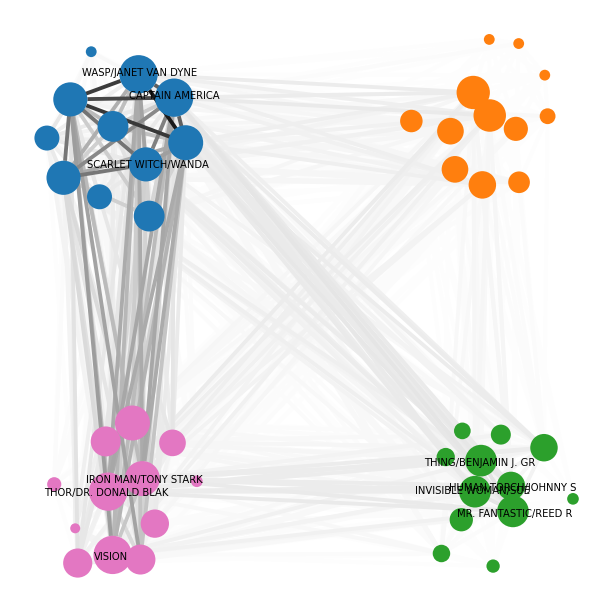

In [ ]:
node_to_community_silver = dict()
node = 0
for i in range(len(layer_one)):
  node_to_community_silver[node_lis_sorted[i]] = layer_one[i]

node_size_silver = [i*5 for i in nx.algorithms.centrality.degree_centrality(silver_sub).values()]
node_size_silver_dic = dict()
node = 0
for i in range(len(node_size_silver)):
  node_size_silver_dic[node_lis_sorted[i]] = node_size_silver[i]

silver_label = dict()
degree = nx.algorithms.centrality.degree_centrality(silver_sub)
top10_ids = sorted(degree, key=degree.get, reverse=True)[:10]
node = 0
for i in node_index:
  silver_label[node_lis_sorted[i]] = node_lis_sorted[i]

community_to_color = {
    1 : 'tab:blue',
    2 : 'tab:orange',
    3 : 'tab:pink',
    4 : 'tab:green',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community_silver.items()}
plt.subplots(figsize=(11,11))
Graph(silver_sub,  
      node_color=node_color, node_edge_width=0, edge_alpha=1,node_size = node_size_silver_dic, node_labels = silver_label,  node_label_fontdict=dict(size=10, clip_on = False), node_label_offset=0.006,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community_silver)#, edge_layout_kwargs=dict(k=2000), 
)

plt.show()

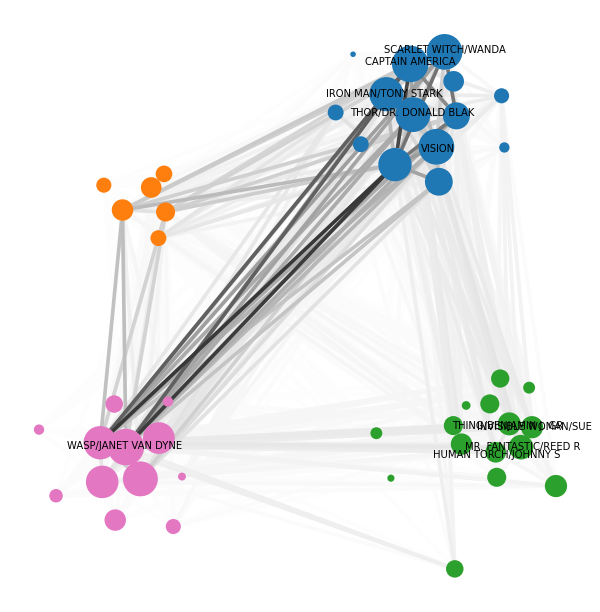

In [ ]:
node_to_community_bronze = dict()
node = 0
for i in range(len(layer_two)):
  node_to_community_bronze[node_lis_sorted[i]] = layer_two[i]

node_size_bronze = [i*5 for i in nx.algorithms.centrality.degree_centrality(bronze_sub).values()]
node_size_bronze_dic = dict()
node = 0
for i in range(len(node_size_bronze)):
  node_size_bronze_dic[node_lis_sorted[i]] = node_size_bronze[i]

bronze_label = dict()
degree = nx.algorithms.centrality.degree_centrality(bronze_sub)
top10_ids = sorted(degree, key=degree.get, reverse=True)[:15]
node = 0
for i in range(15):
  bronze_label[top10_ids[i]] = top10_ids[i]

community_to_color = {
    1 : 'tab:blue',
    2 : 'tab:orange',
    3 : 'tab:pink',
    4 : 'tab:green',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community_bronze.items()}
plt.subplots(figsize=(11,11))
Graph(silver_sub,  
      node_color=node_color, node_edge_width=0, edge_alpha=1,node_size = node_size_bronze_dic, node_labels = silver_label,  node_label_fontdict=dict(size=10, clip_on = False), node_label_offset=0.006,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community_bronze)#, edge_layout_kwargs=dict(k=2000), 
)

plt.show()

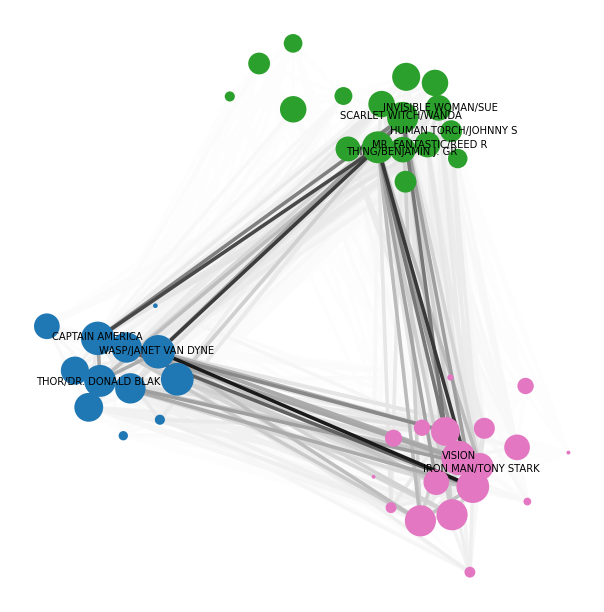

In [ ]:
node_to_community_modern = dict()
node = 0
for i in range(len(layer_three)):
  node_to_community_modern[node_lis_sorted[i]] = layer_three[i]

node_size_modern = [i*5 for i in nx.algorithms.centrality.degree_centrality(modern_sub).values()]
node_size_modern_dic = dict()
node = 0
for i in range(len(node_size_modern)):
  node_size_modern_dic[node_lis_sorted[i]] = node_size_modern[i]

modern_label = dict()
degree = nx.algorithms.centrality.degree_centrality(modern_sub)
top10_ids = sorted(degree, key=degree.get, reverse=True)[:8]
node = 0
for i in range(8):
  modern_label[top10_ids[i]] = top10_ids[i]

community_to_color = {
    1 : 'tab:blue',
    2 : 'tab:orange',
    3 : 'tab:pink',
    4 : 'tab:green',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community_modern.items()}
plt.subplots(figsize=(11,11))
Graph(silver_sub,  
      node_color=node_color, node_edge_width=0, edge_alpha=1,node_size = node_size_modern_dic, node_labels = silver_label,  node_label_fontdict=dict(size=10, clip_on = False), node_label_offset=0.006,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community_modern)#, edge_layout_kwargs=dict(k=2000), 
)

plt.show()

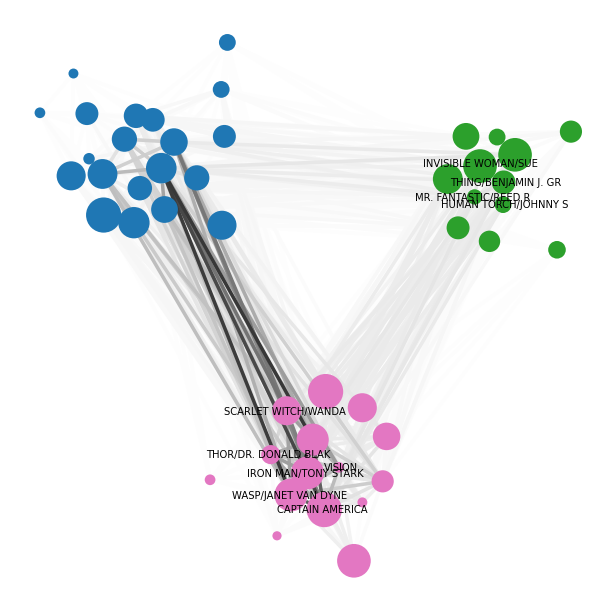

In [ ]:
node_to_community_heroes = dict()
node = 0
for i in range(len(layer_four)):
  node_to_community_heroes[node_lis_sorted[i]] = layer_four[i]

node_size_heroes = [i*5 for i in nx.algorithms.centrality.degree_centrality(heroes_sub).values()]
node_size_heroes_dic = dict()
node = 0
for i in range(len(node_size_modern)):
  node_size_heroes_dic[node_lis_sorted[i]] = node_size_heroes[i]

heroes_label = dict()
degree = nx.algorithms.centrality.degree_centrality(heroes_sub)
top10_ids = sorted(degree, key=degree.get, reverse=True)[:12]
node = 0
for i in range(12):
  heroes_label[top10_ids[i]] = top10_ids[i]

community_to_color = {
    1 : 'tab:blue',
    2 : 'tab:orange',
    3 : 'tab:pink',
    4 : 'tab:green',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community_heroes.items()}
plt.subplots(figsize=(11,11))
Graph(silver_sub,  
      node_color=node_color, node_edge_width=0, edge_alpha=1,node_size = node_size_heroes_dic, node_labels = silver_label,  node_label_fontdict=dict(size=10, clip_on = False), node_label_offset=0.006,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community_heroes)#, edge_layout_kwargs=dict(k=2000), 
)

plt.show()

In [ ]:
node_size_silver = [i*5 for i in nx.algorithms.centrality.degree_centrality(silver_sub).values()]
node_size_silver_dic = dict()
node = 0
for i in range(len(node_size_silver)):
  node_size_silver_dic[node_lis_sorted[i]] = node_size_silver[i]

In [ ]:
silver_label = dict()
degree = nx.algorithms.centrality.degree_centrality(silver_sub)
top10_ids = sorted(degree, key=degree.get, reverse=True)[:20]
node = 0
for i in range(15):
  silver_label[top10_ids[i]] = top10_ids[i]

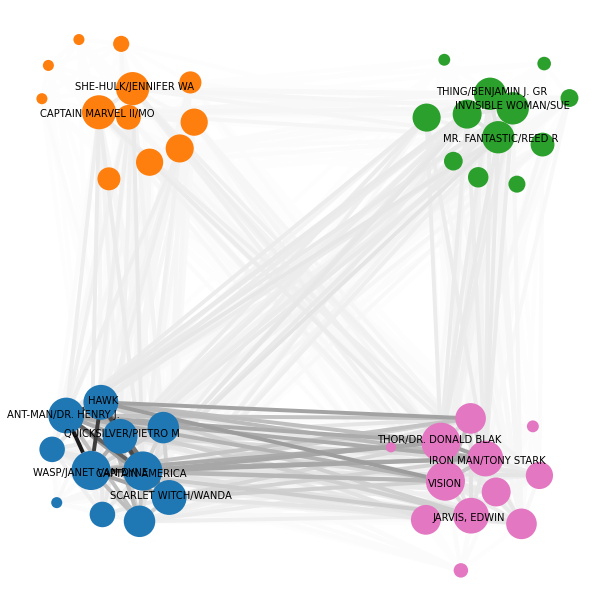

In [ ]:
community_to_color = {
    1 : 'tab:blue',
    2 : 'tab:orange',
    3 : 'tab:pink',
    4 : 'tab:green',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community_silver.items()}
plt.subplots(figsize=(11,11))
Graph(silver_sub,  
      node_color=node_color, node_edge_width=0, edge_alpha=1,node_size = node_size_silver_dic, node_labels = silver_label,  node_label_fontdict=dict(size=10, clip_on = False), node_label_offset=0.006,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community_silver)#, edge_layout_kwargs=dict(k=2000), 
)

plt.show()

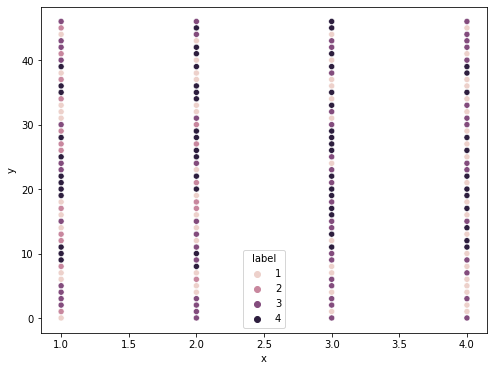

In [ ]:

import seaborn as sns
df = pd.DataFrame(xy, columns=['x','y'])
df['label'] = lis_four_layer
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='label', data=df) 
plt.show()

In [ ]:
axx1 = []
axx2 = []
axx3 = []
axx4 = []
for i in range(10):
  axx1 += [[1,i]]
for i in range(10):
  axx2 += [[2,i]]
for i in range(10):
  axx3 += [[3,i]]
for i in range(10):
  axx4 += [[4,i]]

xy = np.array(axx1+axx2+axx3+axx4)

xy



array([[1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [2, 9],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [3, 9],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [4, 9]])

In [ ]:
np.random.randint(0,10,size=(100, 2))

array([[4, 7],
       [0, 0],
       [5, 9],
       [6, 3],
       [4, 9],
       [5, 8],
       [0, 6],
       [0, 0],
       [9, 1],
       [2, 4],
       [6, 7],
       [5, 6],
       [8, 5],
       [0, 0],
       [2, 5],
       [8, 8],
       [9, 3],
       [1, 2],
       [1, 3],
       [2, 9],
       [1, 0],
       [5, 9],
       [1, 9],
       [7, 6],
       [8, 3],
       [8, 3],
       [8, 6],
       [7, 1],
       [0, 9],
       [4, 6],
       [4, 9],
       [1, 8],
       [3, 5],
       [3, 4],
       [1, 0],
       [6, 0],
       [6, 6],
       [6, 5],
       [6, 4],
       [4, 3],
       [2, 5],
       [5, 0],
       [0, 2],
       [2, 8],
       [5, 2],
       [9, 4],
       [7, 6],
       [9, 1],
       [8, 7],
       [2, 3],
       [1, 6],
       [4, 9],
       [2, 1],
       [9, 9],
       [6, 1],
       [6, 2],
       [7, 2],
       [7, 1],
       [9, 5],
       [7, 4],
       [0, 4],
       [1, 8],
       [2, 6],
       [5, 4],
       [8, 2],
       [0, 5],
       [1,